# Boston Houses Dataset

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston() 

In [4]:
type(boston)

sklearn.utils.Bunch

In [6]:
Xtrain = boston.data
Ytrain = boston.target

In [11]:
type(Xtrain), type(Ytrain)

(numpy.ndarray, numpy.ndarray)

In [13]:
Xtrain.shape,Ytrain.shape

((506, 13), (506,))

In [16]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [20]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [23]:
import pandas as pd
df = pd.DataFrame(Xtrain)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
temp=df.describe()
temp

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Normalise the data

In [35]:
import numpy as np

In [32]:
u, std = temp.loc['mean'],temp.loc['std']

In [36]:
u = u.values
std = std.values

In [37]:
Xtrain = (Xtrain - u)/std

In [42]:
new_df = pd.DataFrame(Xtrain)
new_df.columns = boston.feature_names    

In [43]:
new_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


In [44]:
import matplotlib.pyplot as plt

In [55]:
(new_df['DIS'].loc[:100])

0      0.140075
1      0.556609
2      0.556609
3      1.076671
4      1.076671
         ...   
96    -0.142395
97    -0.142395
98    -0.142395
99    -0.142395
100   -0.483088
Name: DIS, Length: 101, dtype: float64

In [77]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

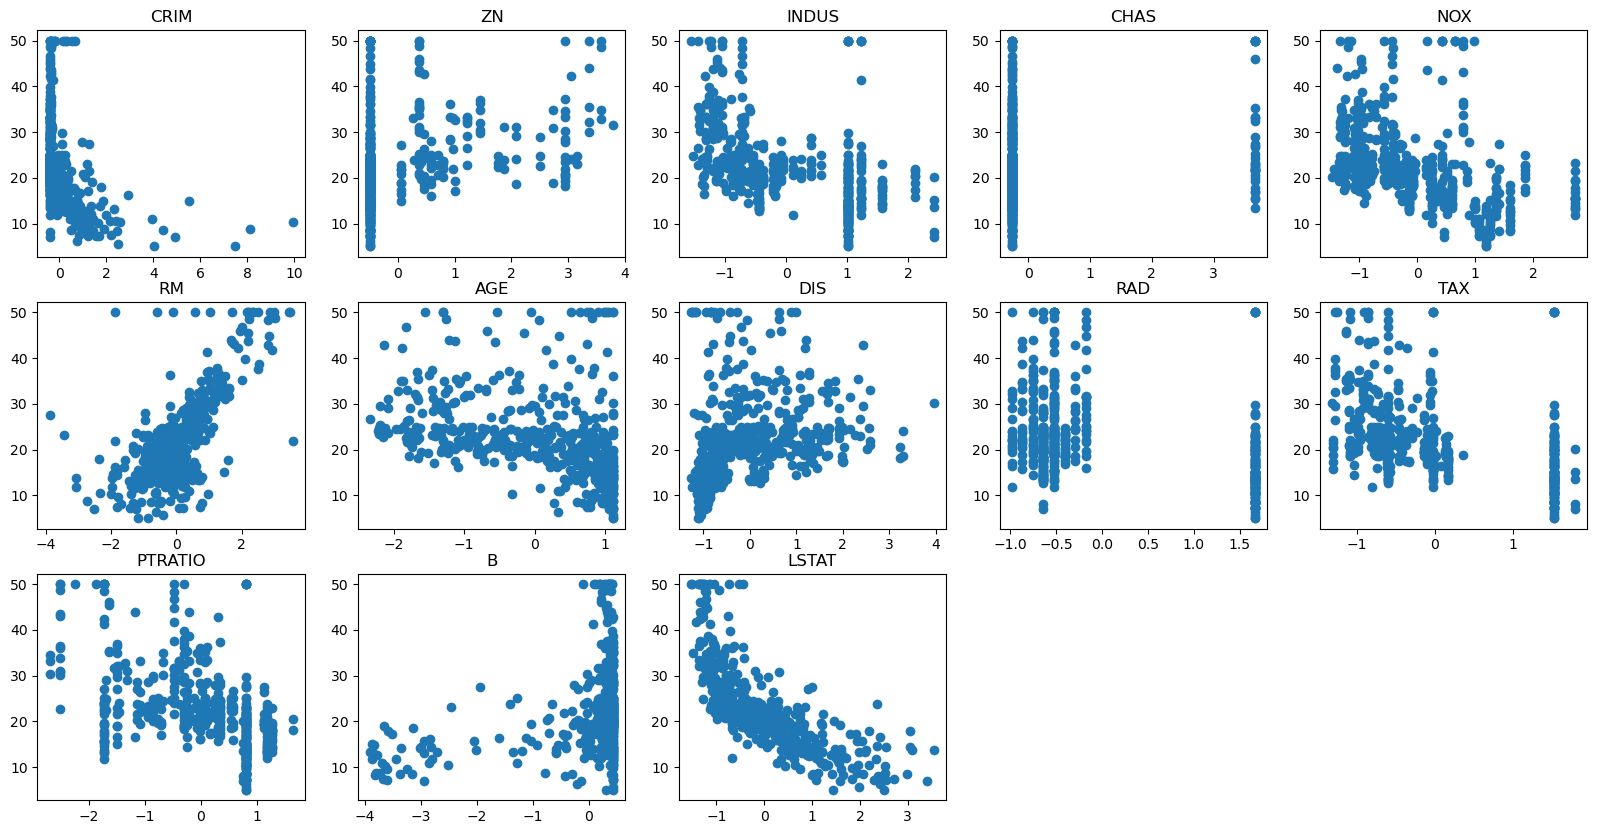

In [93]:
plt.figure(figsize =(20,10))
for i in range(13):
    plt.subplot(3,5,i+1)
    plt.scatter(new_df[boston.feature_names[i]],Ytrain)
    plt.title(boston.feature_names[i])

In [108]:
ones = np.ones((Xtrain.shape[0],1))

In [112]:
Xtrain = np.hstack((ones,Xtrain))

In [113]:
pd.DataFrame(Xtrain)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,1.0,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,1.0,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,1.0,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,1.0,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,1.0,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,1.0,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,1.0,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


In [117]:
# X (capital X) Matrix m x n
# x (lowercase) Vector (Single example with n features)

def hypothesis(x,theta):
    ## predicting for single x
    y_pred = 0.0
    n = x.shape[0] #number of column (n,1)
    for i in range(n):
        y_pred += (theta[i]*x[i]) ## ypred = sum(theta[i]*x[i]) 
    return y_pred

def error(X,y,theta): # mean squared average error
    e = 0.0
    m = X.shape[0] 
    for i in range(m):
        y_pred = hypothesis(X[i],theta)
        e += (y_pred - y[i])**2
    return e / m

def gradient(X,y,theta):
    m,n = X.shape
    grad = np.zeros((n))
    #for all values of j
    for j in range(n):
        #sum over all example
        for i in range(m):
            y_pred = hypothesis(X[i],theta)
            grad[j] += (y_pred - y[i])*X[i][j]
    return grad / m

def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        # Gradient Descent
        grad = gradient(X,y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
        
    return theta,error_list

In [124]:
import time
start_time = time.time()
theta,error_list = gradient_descent(Xtrain,Ytrain) 
end_time  = time.time()
print(f'Time taken is {end_time - start_time}')

Time taken is 44.20258808135986


In [125]:
theta

array([ 2.25328063e+01, -9.03876219e-01,  1.03899676e+00,  1.48881165e-02,
        7.00314016e-01, -2.02279267e+00,  2.70293536e+00, -2.02710081e-03,
       -3.10533753e+00,  2.34464150e+00, -1.72068376e+00, -2.04809751e+00,
        8.48684871e-01, -3.73453420e+00])

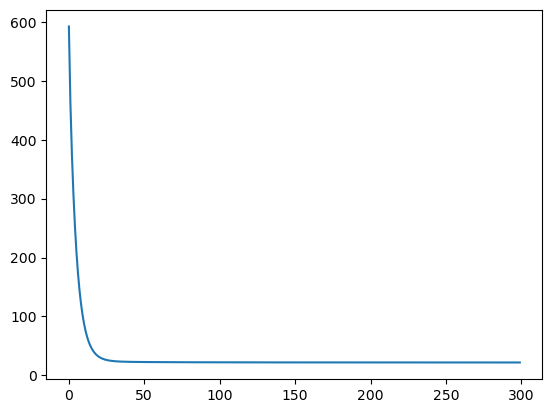

In [122]:
plt.plot(error_list);

## Predictions

In [128]:
y_pred_list = []
for i in range(Xtrain.shape[0]):
    y_pred_list.append(hypothesis(Xtrain[i],theta))
y_pred_list = np.array(y_pred_list)
y_pred_list

array([30.18702489, 24.99083109, 30.56570987, 28.62214264, 27.96209208,
       25.24453458, 22.96570372, 19.49578988, 11.48017881, 18.87872963,
       18.97124463, 21.54025602, 20.89282933, 19.60152287, 19.32386996,
       19.34610152, 20.59866003, 16.95805201, 16.23517261, 18.4456547 ,
       12.55491718, 17.70942405, 15.8857021 , 13.84206194, 15.71588783,
       13.42070624, 15.49792439, 14.75841144, 19.59981075, 20.94007144,
       11.49763837, 18.09377507,  8.88331072, 14.31623607, 13.76005096,
       23.77713223, 22.30973307, 23.08763589, 22.90938464, 31.27526331,
       34.14906016, 27.99145803, 25.15145388, 24.56181493, 22.86639854,
       22.01267441, 20.35052641, 17.94204876,  9.00284259, 17.10924547,
       21.16420969, 23.8400109 , 27.56289428, 23.94244018, 15.70894981,
       30.96257545, 24.93780236, 32.91391314, 21.63248034, 20.92343144,
       17.69711096, 18.32548955, 23.82560674, 22.42793356, 23.34900359,
       30.37520249, 25.52546973, 21.23109027, 17.5260995 , 20.89

## Score of the model

In [129]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [130]:
r2_score(Ytrain,y_pred_list)

74.04526884082144

# Section-3 Optimising Code using Vectorization
An Efficent Implemenation for Linear Regression using Vectorization

- Avoid loops in the implemenation, except gradient descent main loop
- Use numpy functions like np.sum(), np.dot() which are quite fast and already optimised

In [133]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    m =X.shape[0] 
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/m
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

In [134]:
start = time.time()
theta,error_list = gradient_descent(Xtrain,Ytrain)
end = time.time()
print("Time taken by Vectorized Code",end-start)

Time taken by Vectorized Code 0.2923471927642822


In [135]:
theta

array([ 2.25328063e+01, -9.03876219e-01,  1.03899676e+00,  1.48881165e-02,
        7.00314016e-01, -2.02279267e+00,  2.70293536e+00, -2.02710081e-03,
       -3.10533753e+00,  2.34464150e+00, -1.72068376e+00, -2.04809751e+00,
        8.48684871e-01, -3.73453420e+00])

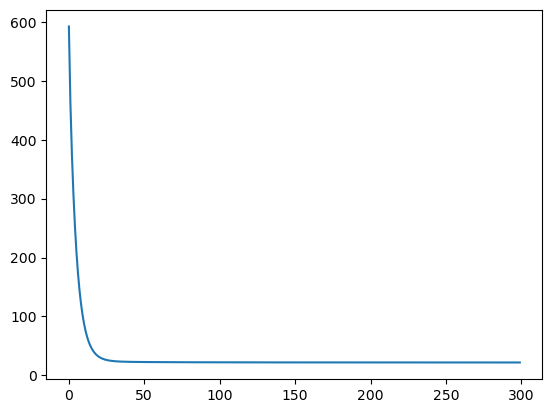

In [136]:
plt.plot(error_list)
plt.show()

In [139]:
## Predictions
y_pred = hypothesis(Xtrain,theta)
r2_score(Ytrain,y_pred)

74.04526884082144